Saving retail_India.xlsx to retail_India (1).xlsx


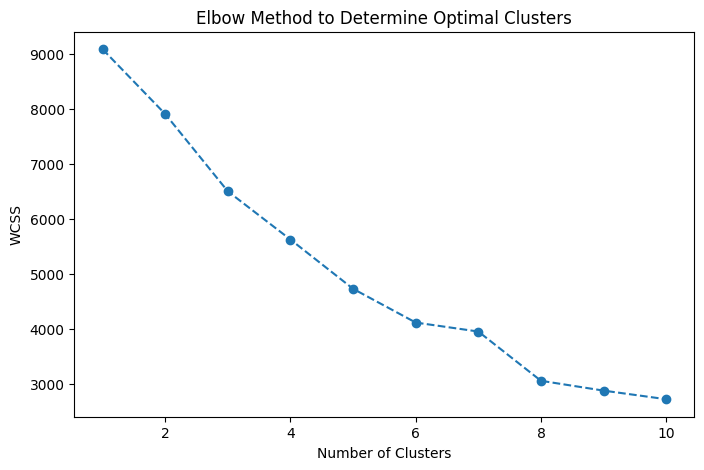

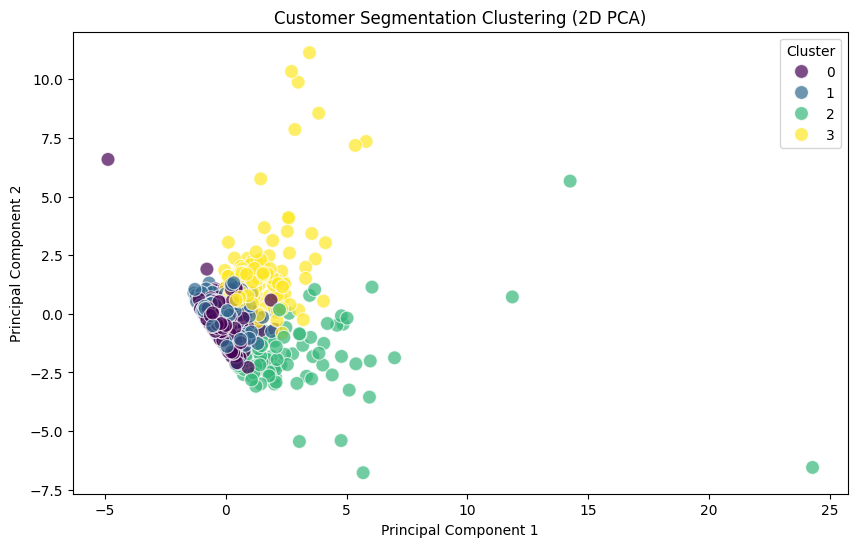

Cluster-wise Summary Statistics:
               Sales       Profit  Quantity ordered new  Discount offered  \
Cluster                                                                     
0         485.602864   109.880297             12.120339          0.018462   
1         507.062954    93.119957             12.097451          0.076267   
2        8838.423000  1929.386676             52.575000          0.049507   
3        2165.269551  -173.455854              9.741573          0.049389   

         Unit Price  Freight Expenses  
Cluster                                
0         49.511220          6.853508  
1         51.871904          6.313073  
2        295.982500         16.812250  
3        404.928427         44.223315  


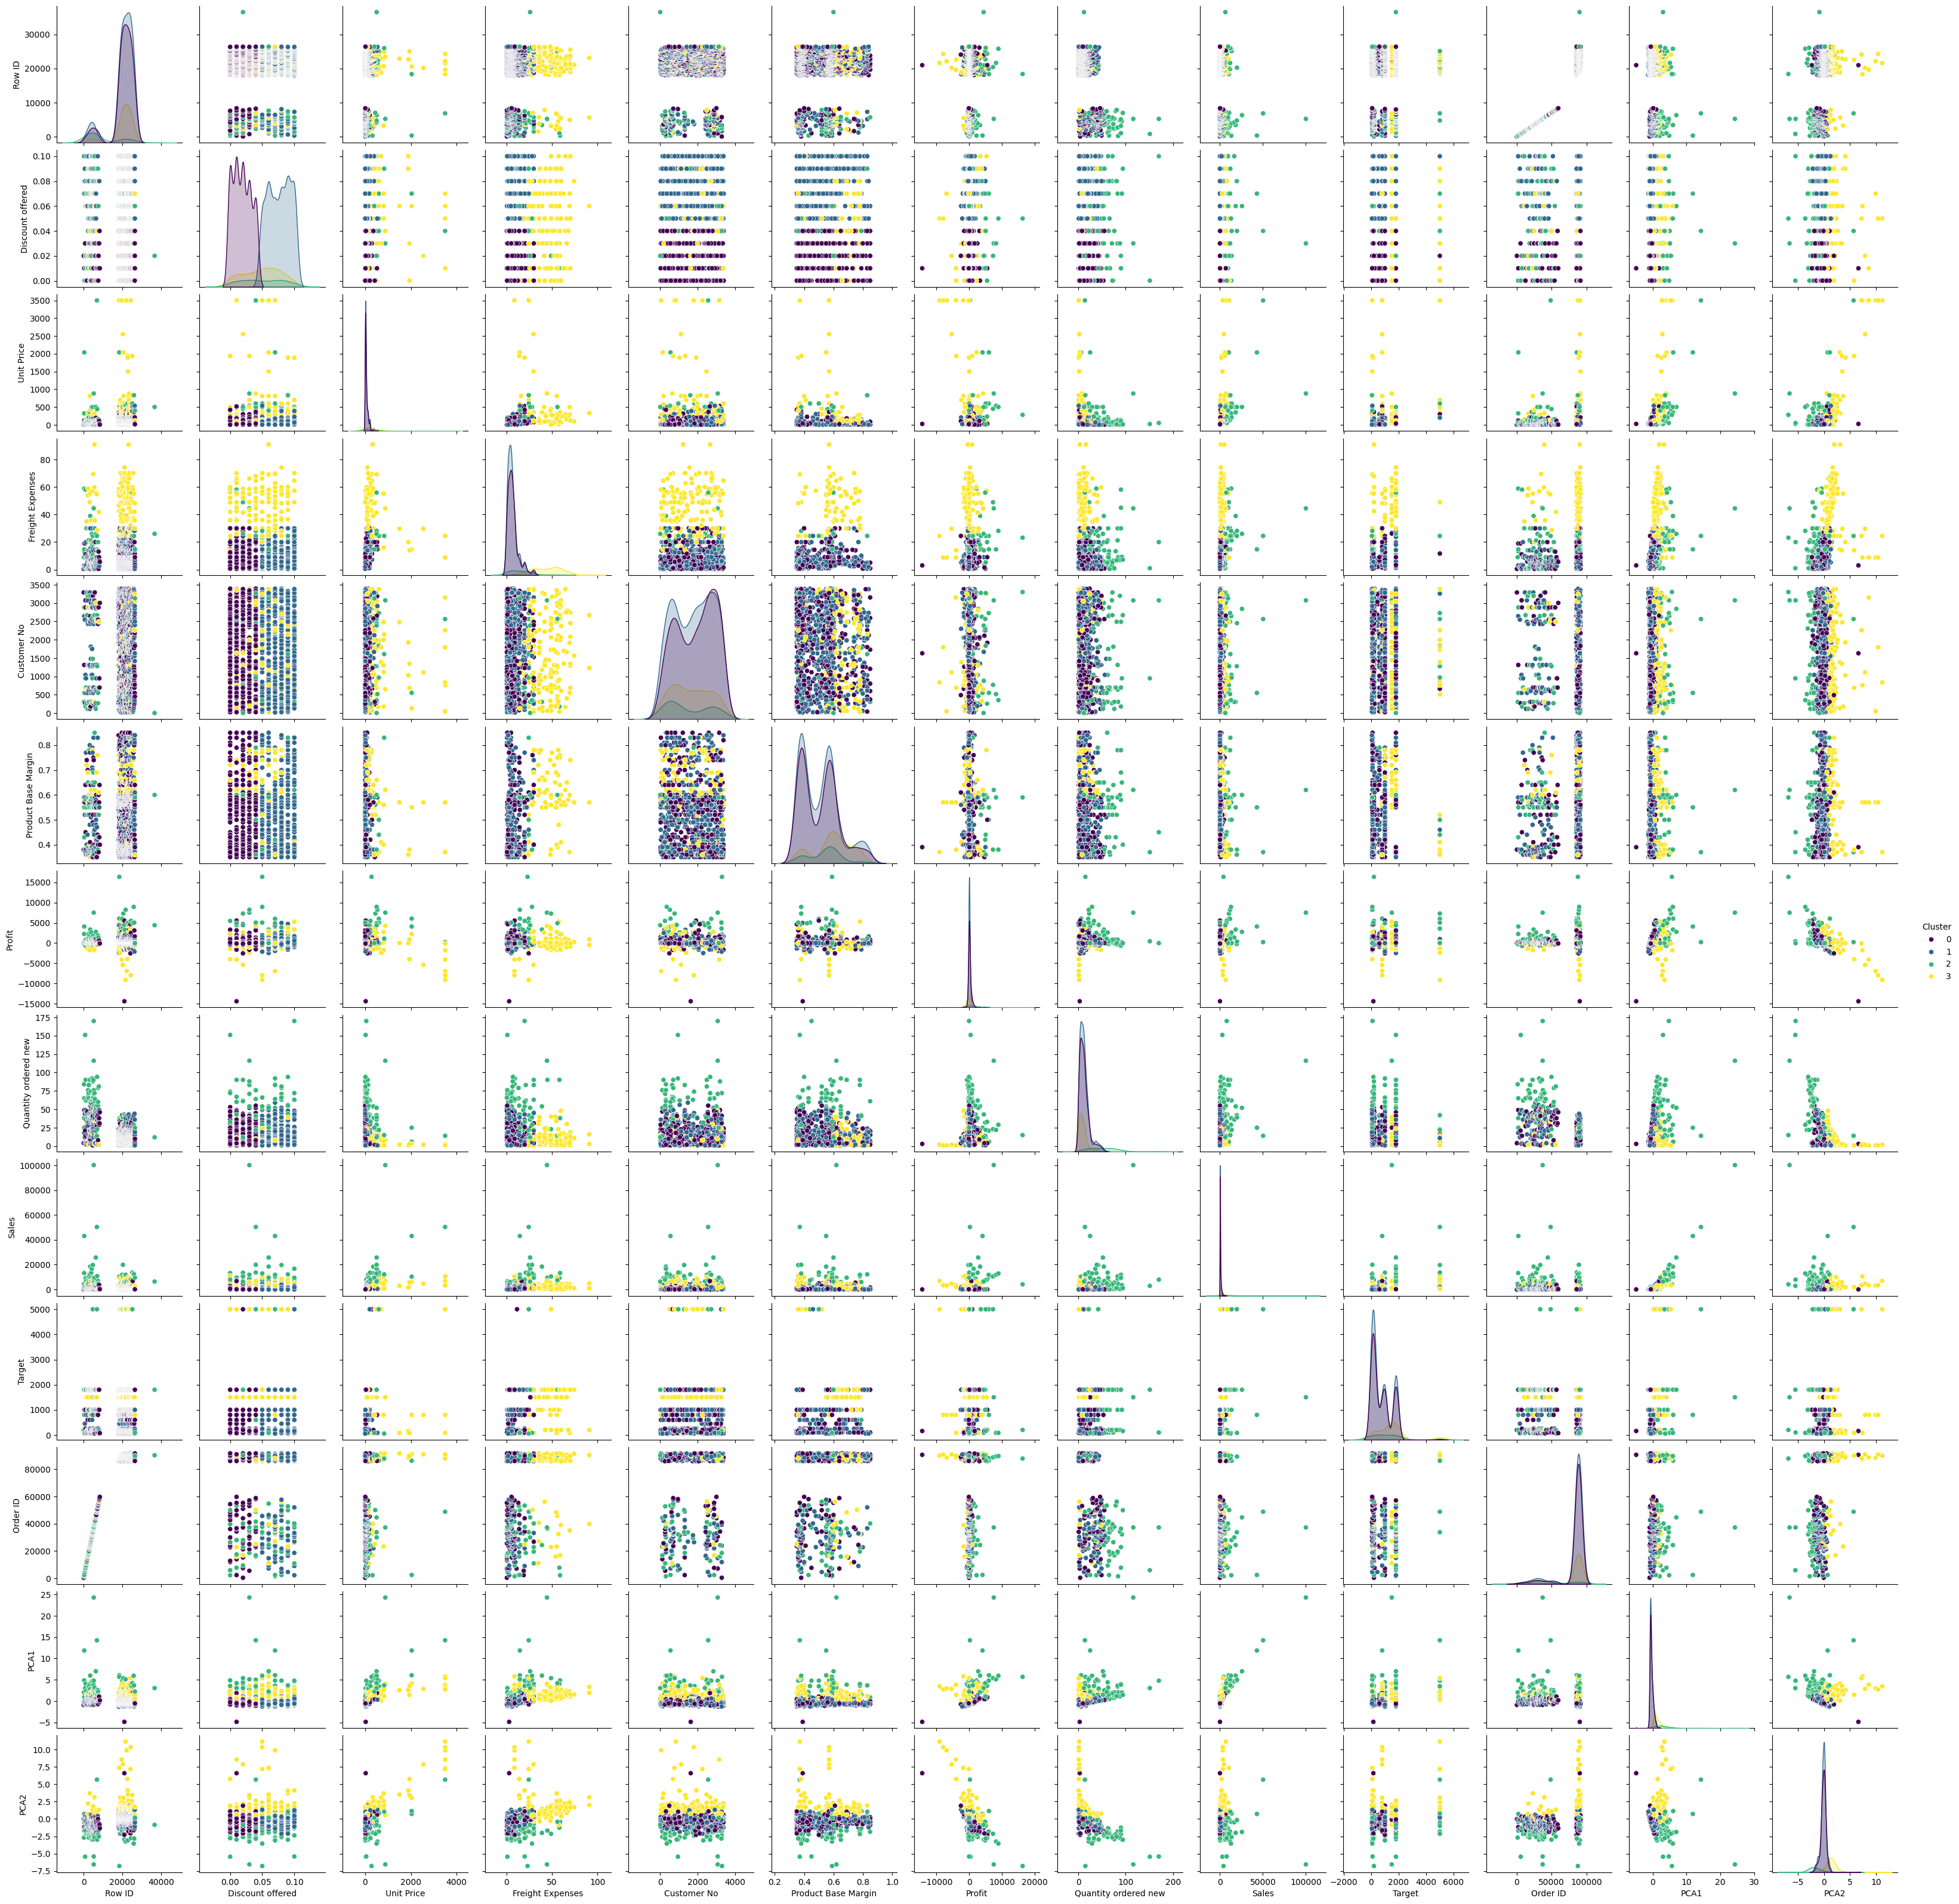

In [1]:
# Install necessary libraries (if not installed)
!pip install pandas matplotlib seaborn scikit-learn openpyxl

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files

# Upload file manually in Colab
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
xls = pd.ExcelFile(file_name)

# Load the 'rawdata' sheet
df = pd.read_excel(xls, sheet_name='rawdata')

# Drop missing values for cleaner clustering
df = df.dropna()

# Select key features for clustering
features = [
    "Sales", "Profit", "Quantity ordered new", "Discount offered",
    "Unit Price", "Freight Expenses"
]

# Normalize the selected features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Find the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()

# Perform K-Means Clustering (choosing k=4 based on the elbow method)
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Scatter plot of clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette="viridis", s=100, alpha=0.7)
plt.title('Customer Segmentation Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Display cluster-wise summary statistics
print("Cluster-wise Summary Statistics:")
print(df.groupby('Cluster')[features].mean())

# Pair plot to visualize relationships
sns.pairplot(df, hue="Cluster", diag_kind="kde", palette="viridis")
plt.show()


In [2]:
import matplotlib.pyplot as plt

# Define explanations for each graph
elbow_explanation = """
📌 **Elbow Method:**
- This graph helps determine the optimal number of clusters (K) for K-Means Clustering.
- The X-axis represents the number of clusters (K), while the Y-axis represents the Within-Cluster Sum of Squares (WCSS).
- We look for the "elbow point" where the rate of decrease in WCSS slows down.
- In this case, the elbow appears around K=4, suggesting 4 clusters is a good choice.
"""

pca_explanation = """
📌 **Customer Segmentation (2D PCA Scatter Plot):**
- This graph visualizes customer clusters after applying PCA to reduce dimensions.
- Each dot represents a customer, and colors indicate different clusters.
- Customers closer together have similar purchasing behavior.
- Outliers (far from clusters) might indicate unique spending patterns.
"""

pairplot_explanation = """
📌 **Pair Plot:**
- This graph shows relationships between different features used in clustering.
- The diagonal plots show the distribution of each feature for different clusters.
- Scatter plots in other cells show how two features interact.
- Clusters appear in different colors, revealing feature-based segmentation.
"""

# Display explanations as text output
print(elbow_explanation)
print("\n" + "="*80 + "\n")
print(pca_explanation)
print("\n" + "="*80 + "\n")
print(pairplot_explanation)



📌 **Elbow Method:**
- This graph helps determine the optimal number of clusters (K) for K-Means Clustering.
- The X-axis represents the number of clusters (K), while the Y-axis represents the Within-Cluster Sum of Squares (WCSS).
- We look for the "elbow point" where the rate of decrease in WCSS slows down.
- In this case, the elbow appears around K=4, suggesting 4 clusters is a good choice.




📌 **Customer Segmentation (2D PCA Scatter Plot):**
- This graph visualizes customer clusters after applying PCA to reduce dimensions.
- Each dot represents a customer, and colors indicate different clusters.
- Customers closer together have similar purchasing behavior.
- Outliers (far from clusters) might indicate unique spending patterns.




📌 **Pair Plot:**
- This graph shows relationships between different features used in clustering.
- The diagonal plots show the distribution of each feature for different clusters.
- Scatter plots in other cells show how two features interact.
- Clusters 